In [89]:
system = mda.Universe('../input/SYSTEM.pdb', f'lambda-1.000/traj000000001.dcd')
print(system.select_atoms("index 5193"))

<AtomGroup [<Atom 5194: OAA of type O of resname LIG, resid 1 and segid SYSTEM and altLoc >]>


In [83]:
import matplotlib.pyplot as plt
import os
import sys
import MDAnalysis as mda
import numpy as np

def avg_water_within_5(lam_val, window_size=10, index=0):
    '''Returns the average number of water molecules within 5 A of
    a given atom index for a given system (pdb), 
    percentage of frames (per window), and lambda value. Default index is 0 (N of PRT)'''
    system = mda.Universe('../input/SYSTEM.pdb', f'lambda-{lam_val}/traj000000001.dcd')
    no_close_waters = []
    # average each n % of windows
    no_frames_in_window = int(round(len(system.trajectory)*((window_size)/100),0))
    frames_to_use = [] # this is a list of lists
    for window in range(int((100/window_size))):
        frames_in_window=[]
        first_frame = window*no_frames_in_window
        last_frame = (window+1)*no_frames_in_window
        for frame in range(first_frame, last_frame):
            frames_in_window.append(frame)
        frames_to_use.append(frames_in_window)

    av_waters=[]
    for window in frames_to_use:
        no_close_waters=[]
        for frame in window:
            system.trajectory[frame]
            no_close_waters.append(len(system.select_atoms(f'resname WAT and sphzone 5 index {index}')))
        av_waters.append(round((sum(no_close_waters)/len(no_close_waters)),2))

    return av_waters, frames_to_use


# Define lambda values
lam_folders = [x for x in os.listdir() if 'lambda' in x]
lam_folders.sort()
lam_vals = [x[-5:] for x in lam_folders]

# Calculate average number of waters within 5 A of selected residue
# for each lam window for each time window
avg_close_waters = []
initial_frames = []
frames = []

for lam_val in lam_vals:
    avg_close_waters_single_lam, frames = avg_water_within_5(lam_val,window_size=10,index=4881)
    avg_close_waters.append(avg_close_waters_single_lam)
    frames = frames

In [7]:
avg_water_within_5('0.250')

[1.37, 0.0, 0.13, 4.23, 6.3, 6.5, 9.3, 8.4, 7.87, 8.53]

In [84]:
starting_frames=[]
for frame_list in frames:
    starting_frames.append(frame_list[0])

In [85]:
# reverse rows and colums
array_avg_close_waters = np.array(avg_close_waters).transpose()

/home/finlayclark/anaconda3/envs/biosimspace-dev/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


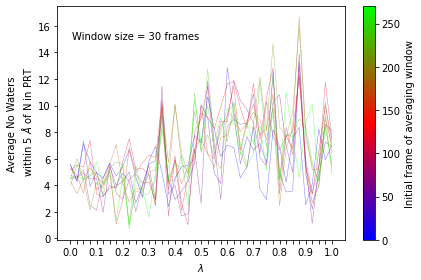

In [86]:
import matplotlib.cm as cm
import matplotlib.colors as colors

norm = colors.Normalize(vmin=starting_frames[0], vmax=starting_frames[-1], clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.brg)

fig, ax = plt.subplots()
fig.colorbar(mapper).set_label('Initial frame of averaging window')
for i, frame in enumerate(starting_frames):
    ax.plot(lam_vals, array_avg_close_waters[i], c=mapper.to_rgba(frame), alpha=0.5, lw=0.5)
    ax.set_xlabel(r'$\lambda$')
    ax.set_ylabel('Average No Waters\n within 5 $\AA$ of N in PRT')

ax.text(0.3, 15, f'Window size = {starting_frames[1]-starting_frames[0]} frames')

rounded_lam_vals =  [round(float(x),2) for x in lam_vals]

ax.set_xticklabels(rounded_lam_vals)
every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

fig.tight_layout()
fig.savefig(f'waters_within_5_moving_avg_window_size_{starting_frames[1]-starting_frames[0]}_ILE.png', dpi=1000, facecolor='w')